# 1. Fuente De Datos

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
columns = ['COD DEP', 'DEPARTAMENTO', 'COD MUN', 'MUNICIPIO',
           'GRUPO CULTIVO', 'SUBGRUPO CULTIVO', 'CULTIVO',
           'DESAGREGACION REGIONAL Y/O SISTEMA PRODUCTIVO', 'ANIO', 'PERIODO',
           'AREA SEMBRADA (ha)', 'AREA COSECHADA (ha)', 'PRODUCCION (t)',
           'RENDIMIENTO (t/ha)', 'ESTADO FISICO PRODUCCION',
           'NOMBRE CIENTIFICO', 'CICLO DE CULTIVO']

In [ ]:
# Lectura del Df
df = pd.read_csv('/content/Evaluaciones_Agropecuarias_Municipales_EVA_20240703.csv')
df.columns = columns

# 2. Protocolos de Limpieza de Datos



## 2.1. *Nulos*

In [ ]:
# Mira Valores Nulos
print(df.isnull().sum())

COD DEP                                             0
DEPARTAMENTO                                        0
COD MUN                                             0
MUNICIPIO                                           1
GRUPO CULTIVO                                       0
SUBGRUPO CULTIVO                                    0
CULTIVO                                             0
DESAGREGACION REGIONAL Y/O SISTEMA PRODUCTIVO       0
ANIO                                                0
PERIODO                                             0
AREA SEMBRADA (ha)                                  0
AREA COSECHADA (ha)                                 0
PRODUCCION (t)                                      0
RENDIMIENTO (t/ha)                               3433
ESTADO FISICO PRODUCCION                            0
NOMBRE CIENTIFICO                                2857
CICLO DE CULTIVO                                    0
dtype: int64


In [ ]:
# Corrección Valores Nulos:

# Municipio solo uno es nulo
df.loc[df['MUNICIPIO'].isnull(), 'MUNICIPIO'] = 'BAJO BAUDÓ'

# Rendimiento
# Los rendimientos en 0 son porque no hubo area cosechada
df.loc[df['RENDIMIENTO (t/ha)'].isnull(), 'RENDIMIENTO'] = 0

# Nombre Cientifico
df.loc[df['NOMBRE CIENTIFICO'].isnull(), 'NOMBRE CIENTIFICO'] = 'No Aplica'


In [ ]:
# Mira Nulos con corrección
print(df.isnull().sum())

COD DEP                                               0
DEPARTAMENTO                                          0
COD MUN                                               0
MUNICIPIO                                             0
GRUPO CULTIVO                                         0
SUBGRUPO CULTIVO                                      0
CULTIVO                                               0
DESAGREGACION REGIONAL Y/O SISTEMA PRODUCTIVO         0
ANIO                                                  0
PERIODO                                               0
AREA SEMBRADA (ha)                                    0
AREA COSECHADA (ha)                                   0
PRODUCCION (t)                                        0
RENDIMIENTO (t/ha)                                 3433
ESTADO FISICO PRODUCCION                              0
NOMBRE CIENTIFICO                                     0
CICLO DE CULTIVO                                      0
RENDIMIENTO                                     

## 2.2. *Formato de los datos*

In [ ]:
df['COD DEP'] = df['COD DEP'].astype(int, errors='raise')
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].astype(str, errors='raise')
df['COD MUN'] = df['COD MUN'].astype(int, errors='raise')
df['MUNICIPIO'] = df['MUNICIPIO'].astype(str, errors='raise')
df['GRUPO CULTIVO'] = df['GRUPO CULTIVO'].astype(str, errors='raise')
df['SUBGRUPO CULTIVO'] = df['SUBGRUPO CULTIVO'].astype(str, errors='raise')
df['CULTIVO'] = df['CULTIVO'].astype(str, errors='raise')
df['DESAGREGACION REGIONAL Y/O SISTEMA PRODUCTIVO'] = df['DESAGREGACION REGIONAL Y/O SISTEMA PRODUCTIVO'].astype(str,
                                                                                                                 errors='raise')
df['ANIO'] = df['ANIO'].astype(int, errors='raise')
df['PERIODO'] = df['PERIODO'].astype(str, errors='raise')
df['AREA SEMBRADA (ha)'] = df['AREA SEMBRADA (ha)'].astype(float, errors='raise')
df['AREA COSECHADA (ha)'] = df['AREA COSECHADA (ha)'].astype(float, errors='raise')
df['PRODUCCION (t)'] = df['PRODUCCION (t)'].astype(float, errors='raise')
df['RENDIMIENTO (t/ha)'] = df['RENDIMIENTO (t/ha)'].astype(float, errors='raise')
df['ESTADO FISICO PRODUCCION'] = df['ESTADO FISICO PRODUCCION'].astype(str, errors='raise')
df['NOMBRE CIENTIFICO'] = df['NOMBRE CIENTIFICO'].astype(str, errors='raise')
df['CICLO DE CULTIVO'] = df['CICLO DE CULTIVO'].astype(str, errors='raise')

In [ ]:
df.dtypes

COD DEP                                            int64
DEPARTAMENTO                                      object
COD MUN                                            int64
MUNICIPIO                                         object
GRUPO CULTIVO                                     object
SUBGRUPO CULTIVO                                  object
CULTIVO                                           object
DESAGREGACION REGIONAL Y/O SISTEMA PRODUCTIVO     object
ANIO                                               int64
PERIODO                                           object
AREA SEMBRADA (ha)                               float64
AREA COSECHADA (ha)                              float64
PRODUCCION (t)                                   float64
RENDIMIENTO (t/ha)                               float64
ESTADO FISICO PRODUCCION                          object
NOMBRE CIENTIFICO                                 object
CICLO DE CULTIVO                                  object
RENDIMIENTO                    

## 2.3. *Filtro Cundinamrca y Boyacá*

In [ ]:
# Este hace parte del inciso 1.
df = df[df['DEPARTAMENTO'].isin(['BOYACA', 'CUNDINAMARCA'])].copy()

# 3. Analisis Exploratorio de Datos

## *3.1* Encontrar Variables

Variables a tener en cuenta, departamento, Municipio, Las tres segmentaciones de Grupos, año, periodo, area, area cosechada y el rendimiento, estado fisico, ciclo del cultivo  

In [ ]:
df_conteo_mun = df.groupby('DEPARTAMENTO').agg({'MUNICIPIO': 'nunique'}).reset_index()

df_conteo_diversidad = df.groupby('DEPARTAMENTO').agg({'CULTIVO': 'nunique'}).reset_index()

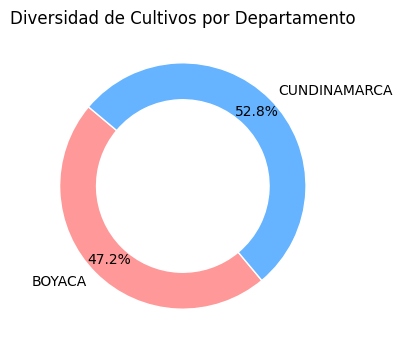

In [ ]:
# Etiquetas para las porciones del anillo
labels = df_conteo_diversidad['DEPARTAMENTO']

# Datos numéricos para cada porción del anillo
sizes = df_conteo_diversidad['CULTIVO']

# Colores opcionales para cada porción del anillo
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Tamaño del agujero en el medio del anillo (en porcentaje)
hole_size = 0.3

# Crear el gráfico de anillo
plt.figure(figsize=(5, 4))  # Tamaño de la figura
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, wedgeprops=dict(width=hole_size, edgecolor='w'))

# Añadir un círculo blanco en el centro para crear el agujero
centre_circle = plt.Circle((0, 0), hole_size/2, color='white')
plt.gca().add_artist(centre_circle)

# Añadir un título
plt.title('Diversidad de Cultivos por Departamento')

# Mostrar el gráfico
plt.show()

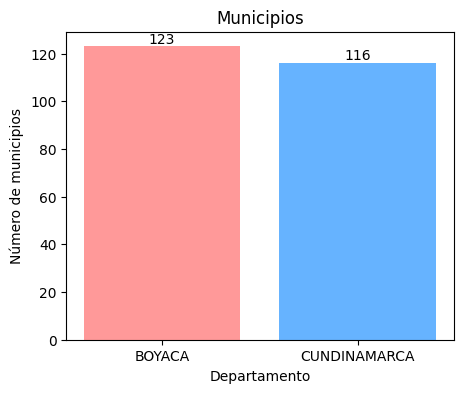

In [ ]:
x = df_conteo_mun['DEPARTAMENTO']
# Alturas de las barras
height = df_conteo_mun['MUNICIPIO']

plt.figure(figsize=(5, 4))  # Tamaño de la figura
bars = plt.bar(x, height, color=['#ff9999','#66b3ff','#99ff99'])

# Añadir etiquetas a los ejes
plt.xlabel('Departamento')
plt.ylabel('Número de municipios')
plt.title('Municipios')

# Añadir valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
df

In [ ]:
# OJO = Porque el area sembrada puede venir co 0?

df[['AREA SEMBRADA (ha)',	'AREA COSECHADA (ha)',	'PRODUCCION (t)']].describe()

,AREA SEMBRADA (ha),AREA COSECHADA (ha),PRODUCCION (t)
count,38381.000000,38381.000000,38381.000000
mean,137.575597,122.992418,1295.336469
std,442.524396,401.038473,6142.099698
min,0.000000,0.000000,0.000000
25%,9.000000,7.000000,24.000000
50%,27.000000,22.000000,104.000000
75%,90.000000,80.000000,505.000000
max,10000.000000,10000.000000,241564.000000


from matplotlib import pyplot as plt
_df_0['AREA SEMBRADA (ha)'].plot(kind='hist', bins=20, title='AREA SEMBRADA (ha)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['AREA COSECHADA (ha)'].plot(kind='hist', bins=20, title='AREA COSECHADA (ha)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['PRODUCCION (t)'].plot(kind='hist', bins=20, title='PRODUCCION (t)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='AREA SEMBRADA (ha)', y='AREA COSECHADA (ha)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='AREA COSECHADA (ha)', y='PRODUCCION (t)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['AREA SEMBRADA (ha)'].plot(kind='line', figsize=(8, 4), title='AREA SEMBRADA (ha)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['AREA COSECHADA (ha)'].plot(kind='line', figsize=(8, 4), title='AREA COSECHADA (ha)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['PRODUCCION (t)'].plot(kind='line', figsize=(8, 4), title='PRODUCCION (t)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df[df['DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO'] != df['CULTIVO']]

In [ ]:
df['PERIODO'].drop_duplicates()